# FIT5201 S1 2020 Assessment 1: Question 3 - Bootstrapping


Student information
- Family Name:Muralitharan
- Given Name: Keerthana
- Student ID: 30159474
- Student email:kmur0015@student.monash.edu

Programming Language: R 3.3 in Jupyter Notebook

R Libraries used:
- reshape2
- ggplot

In [1]:
#importing the packages required
require(reshape2)
require(ggplot2)

Loading required package: reshape2

Loading required package: ggplot2



#### Question

Load Task1B_train.csv and Task1B_test.csv sets. Apply your bootstrapping for KNN regression with times = 50 (the number of subsets), size = 20 (the size of each subset), and change K=1,.., 15 (the neighbourhood size). Now create a boxplot where the x-axis is K, and the y-axis is the average error (and the uncertainty around it) corresponding to each K. Save the plot in your Jupyter Notebook file for Question 3.

##### Reading the train and test datasets

In [6]:
#Reading the train and test data
task3train <- read.csv('Task1B_train.csv', header = TRUE)

cat("Small snippet of the training dataset\n")
head(task3train)
cat("The dimensions of the dataset:\n",dim(task3train))

#Initializing the input and target values

train.data <- task3train[1:4] 
train.label <- task3train[5]


#Reading the train and test data
task3test <- read.csv('Task1B_test.csv', header = TRUE)

cat("\n\nSmall snippet of the test dataset\n")
head(task3test)
cat("\n\nThe dimensions of the dataset:\n",dim(task3test))

#Initializing the input and target values

test.data <- task3test[1:4] 
test.label <- task3test[5]



Small snippet of the training dataset


x1,x2,x3,x4,y
1991.496,1628.75,1678.1,1772.8,2443.6
1991.504,1606.51,1678.6,1718.0,2448.2
1991.512,1618.16,1686.6,1723.1,2484.7
1991.519,1630.75,1682.9,1734.5,2487.9
1991.527,1635.47,1697.5,1754.0,2510.5
1991.535,1647.84,1723.8,1759.8,2532.5


The dimensions of the dataset:
 930 5

Small snippet of the test dataset


x1,x2,x3,x4,y
1991.500,1613.63,1688.5,1750.5,2460.2
1991.508,1621.04,1684.1,1708.1,2470.4
1991.515,1610.61,1671.6,1714.3,2466.8
1991.523,1640.17,1703.6,1757.4,2508.4
1991.531,1645.89,1716.3,1754.3,2497.4
1991.538,1638.35,1730.5,1755.5,2556.8




The dimensions of the dataset:
 930 5

#### Defining the boot function

Bootstrapping is used to measure the uncertainity while predicting in the model

In [7]:
#Building a boot function to generate indices
boot <- function (original.size, sample.size=original.size, times){
    
    #create a empty matrix to store indices
    indx <- matrix(nrow=times, ncol=sample.size)
    
    #populate the matrix with indices
    for (t in 1:times){
        indx[t, ] <- sample(x=original.size, size=sample.size, replace = TRUE)
    }
    return(indx)
}

##### Defining the error function

The Mean squared error is calculated between the true and predicted values

In [8]:
# Defining the error function
error <- function(true_values, predicted_values)
{
    #calculate the MSE 
    mse = (true_values-predicted_values)^2
    loss = sum(mse)/nrow(true_values)
    
    #return the loss
    return (loss)
}

#### Building a KNN Regressor

In [9]:
#Buiding the KNN function (regressor)
knn <- function(train.data, train.label,test.data,K=3 )
{
 
    # counting the number of train and test samples
    train.len <- nrow(train.data)
    test.len <- nrow(test.data)

    # calculating the distances using the manhattan method
    distance ="manhattan"
    dist <- as.matrix(dist(rbind(test.data, train.data), method=distance))[1:test.len, (test.len+1):(test.len+train.len)]
 
    for (i in 1:test.len)
    {   
        
        # finding the K-nearest neighbours from trained samples
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        
        #finding the mean distance for the K closest neighbours
        test.label[i,1] <- mean(train.label[nn])
    }
    
    
    # return the test labels as output
    return (test.label)
}

#### Setting the parameters for KNN using bootstrapping

The K value,Number of datasets,and size of each dataset is being initialized.The prediction from knn is done for different values of K

In [10]:
# fix the parameters (15,50,20)
K <- 15          # Maximum K for KNN 
L <- 50           # number of datasets
N <- 20          # size of datasets

# generate bootstrap index:
boot.indx <- boot(nrow(train.data), N, L)

# a dataframe to store the number of error samples in each case
miss <- data.frame('K'=1:K, 'L'=1:L, 'test'=rep(0,L*K))

In [11]:
# for every k values:
for (k in 1:K){
    
    # for every dataset sizes:
    for (l in 1:L){
        
        # calculate iteration index i
        i <- (k-1)*L+l
        
        # save sample indices that were selected by bootstrap
        indx <- boot.indx[l,]
        
        # populate the value of k and l
        miss[i,'K'] <- k
        miss[i,'L'] <- l
        
        # calculate the predictions
        pred<-knn(train.data[indx, ], train.label[indx,1], test.data, K=k)
        
        #store the errors in a dataframe
        miss[i,'test'] <- error(test.label,pred)
        
    } 
}

#return the errors
return (miss)

K,L,test
1,1,31768.94
1,2,68137.43
1,3,21767.75
1,4,97167.56
1,5,112611.11
1,6,35182.66
1,7,72348.33
1,8,18242.88
1,9,40342.65
1,10,44698.22


#### Question II.
Based on the plot in the previous part (Part П), how does the test error and its uncertainty behave as K increases? 

 #### Graph 
 The average error across the K values is plotted 

In [12]:
# plot error for train and test data sets
miss.m <- melt(miss, id=c('K', 'L')) # reshape for visualization
names(miss.m) <- c('K', 'L', 'type', 'miss') #renaming the columns

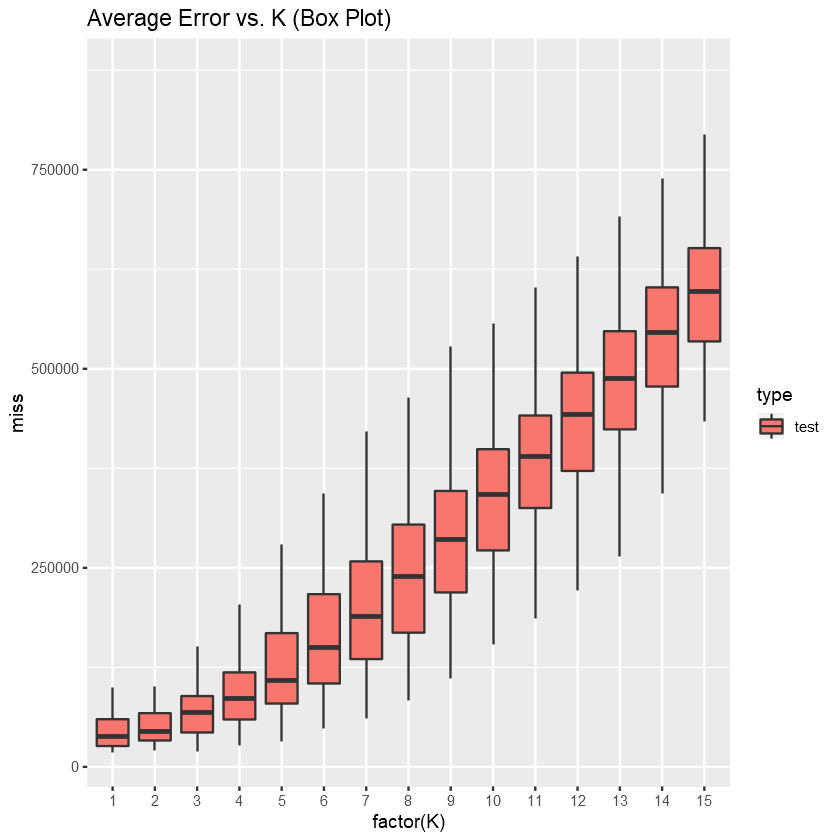

In [13]:
#Plotting the errors versus the size of K
ggplot(data=miss.m[miss.m$type=='test',], aes(factor(K), miss,fill=type)) + geom_boxplot(outlier.shape = NA)  + 
    scale_color_discrete(guide = guide_legend(title = NULL)) + 
    ggtitle('Average Error vs. K (Box Plot)')
# ignore the warnings (because of ignoring outliers)
options(warn=-1)

##### ANSWER :

- As the value of K increases the value of the average test error also increases.

#### Question IV.

Load Task1B_train.csv and Task1B_test.csv sets. Apply your bootstrapping for KNN regression with K= 5(the neighbourhood size), times = 50 (the number of subsets), and change sizes = 5, 10, 15,..., 75 (the size of each subset). Now create a boxplot where the x-axis is ‘sizes’ and the y-axis is the average error (and the uncertainty around it) corresponding to each value of ‘times’.

##### Setting parameters for KNN  for bootstrapping

The N values, K value and the number of datastets is initialised and the knn prediction is done with different size of datasets

In [14]:
# fix the parameters (15,50,20)
K <- 5          # Maximum K for KNN 
L <- 50           # number of datasets
N <- seq(5, 75, by=5)   # size of datasets

# a dataframe to track the number of error samples in each case
miss <- data.frame('N'=seq(5,75,by=5), 'L'=1:L, 'test'=rep(0,L*length(N)))
# for every n values:
for (n in N)
{
    boot.ind <- boot(nrow(train.data), n, L)
    # for every dataset sizes:
    for (l in 1:L){
        
        #### calculate iteration index n
        i <- ((n/5)-1)*L+l
        
        #### save sample indices that were selected by bootstrap
        indx <- boot.ind[l,]
        
        #### save the value of n and l
        miss[i,'N'] <- n
        miss[i,'L'] <- l
        
        #### calculate the predictions
        pred<-knn(train.data[indx, ], train.label[indx,1], test.data, K)
        
        #populate the test errors
        miss[i,'test'] <- error(test.label,pred)
    } 
}
return (miss)

N,L,test
5,1,962684.7
5,2,1277224.0
5,3,1455926.4
5,4,1011512.5
5,5,980051.3
5,6,1001345.6
5,7,955924.5
5,8,1185024.0
5,9,955325.0
5,10,1023912.6


#### Question V.

Based on the plot in the previous part (Part IV), how does the test error and its uncertainty behave as the size of each subset in bootstrapping increases?

##### Graph 

The error values with respect to different size of datasets is done

In [15]:
# plot error for train and test data sets
miss.m <- melt(miss, id=c('N', 'L')) # reshape for visualization
names(miss.m) <- c('N', 'L', 'type', 'miss')

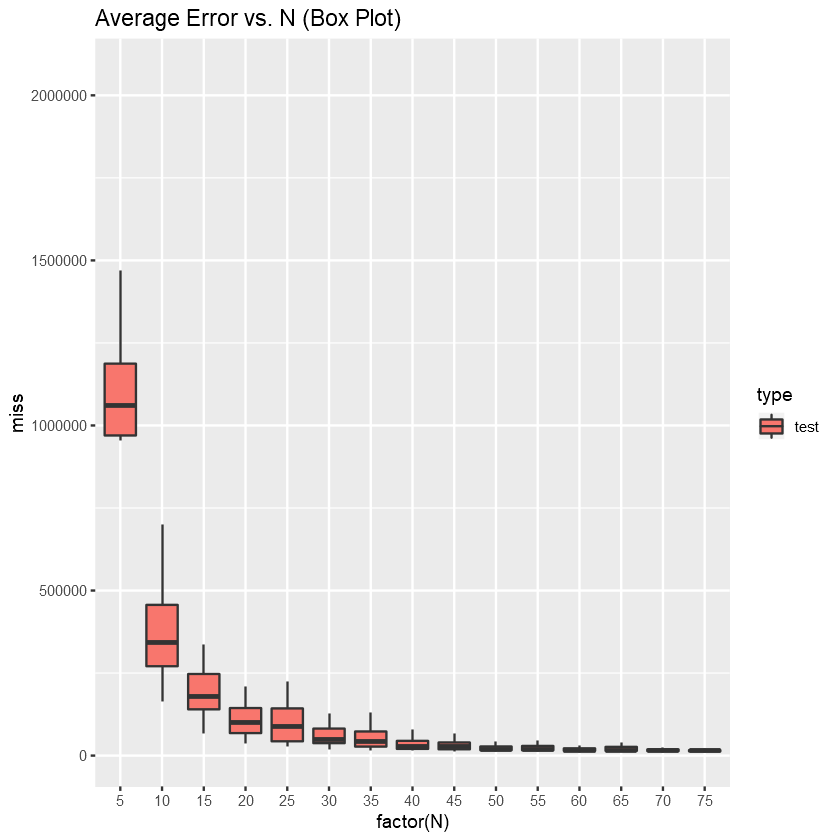

In [16]:
ggplot(data=miss.m[miss.m$type=='test',], aes(factor(N), miss,fill=type)) + geom_boxplot(outlier.shape = NA)  + 
    scale_color_discrete(guide = guide_legend(title = NULL)) + 
    ggtitle('Average Error vs. N (Box Plot)') 
# ignore the warnings (because of ignoring outliers)
options(warn=-1)

#### Answer

- test error and its uncertainity decreases with the increase in the size of the subset.

- greater the subset size, lesser the train error and the model becomes overfit.

#### References
- https://link.springer.com/article/10.1007/s10994-008-5096-0
- http://ml-tutorials.kyrcha.info/knn.html